# Explore relationships, derive columns

 1. Correlations
 
 2. Scatterplots
 
 3. Pair plots
 
 4. Derive new columns
 
 5. Categorical plots
 
 6. Early visual EDA

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Check mastplotlib version
matplotlib.__version__

'3.3.4'

In [3]:
# Display charts with no need to call
%matplotlib inline

In [4]:
# Import data
df = pd.read_csv(r'/Users/OldBobJulia/Desktop/CF/Course/6. Advanced Analytics and Dashboard Design/Berlin Airbnb Analysis/02 Data/Prepared data/listing_wrangled_cleaned.csv')

In [5]:
df.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,0,1944,bright & airy Pberg/Mitte 3 months or more,2164,Lulah,Mitte,Brunnenstr. Nord,52.54433,13.39761,Private room,28.0,60,18,0,0.21,3,101
1,1,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ion,Mitte,Brunnenstr. Süd,52.53305,13.40394,Entire home/apt,74.0,90,141,0,2.20,6,357
2,2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.53471,13.41810,Entire home/apt,90.0,62,147,0,1.14,1,254
3,3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.49884,13.34940,Private room,29.0,7,27,0,0.28,1,285
4,4,6883,Stylish East Side Loft in Center with AC & 2 b...,16149,Steffen,Friedrichshain-Kreuzberg,Frankfurter Allee Süd FK,52.51163,13.45289,Entire home/apt,79.0,7,135,0,1.02,1,0


In [6]:
df.shape

(19095, 17)

In [7]:
# Get rid of unnecessary columns
df_2 = df.drop(columns = ['Unnamed: 0', 'id', 'name', 'host_id', 'host_name', 'last_review', 'neighbourhood'])

In [8]:
df_2.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Mitte,52.54433,13.39761,Private room,28.0,60,18,0.21,3,101
1,Mitte,52.53305,13.40394,Entire home/apt,74.0,90,141,2.20,6,357
2,Pankow,52.53471,13.41810,Entire home/apt,90.0,62,147,1.14,1,254
3,Tempelhof - Schöneberg,52.49884,13.34940,Private room,29.0,7,27,0.28,1,285
4,Friedrichshain-Kreuzberg,52.51163,13.45289,Entire home/apt,79.0,7,135,1.02,1,0


# 1. Correlations

In [9]:
df_2.corr()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,-0.138815,0.016125,0.008874,0.032643,0.025354,0.013753,0.021420
longitude,-0.138815,1.000000,-0.024499,-0.028328,-0.018507,-0.017060,-0.044350,-0.071912
price,0.016125,-0.024499,1.000000,-0.009276,0.016297,0.053842,0.058720,0.134732
minimum_nights,0.008874,-0.028328,-0.009276,1.000000,-0.027836,-0.038206,0.041908,0.130396
number_of_reviews,0.032643,-0.018507,0.016297,-0.027836,1.000000,0.592651,0.017520,0.209097
reviews_per_month,0.025354,-0.017060,0.053842,-0.038206,0.592651,1.000000,0.090360,0.238603
calculated_host_listings_count,0.013753,-0.044350,0.058720,0.041908,0.017520,0.090360,1.000000,0.320418
availability_365,0.021420,-0.071912,0.134732,0.130396,0.209097,0.238603,0.320418,1.000000


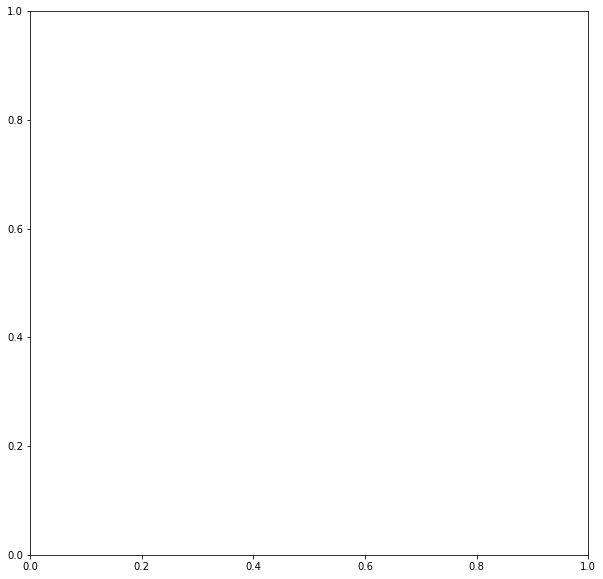

In [10]:
# Create subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

In [11]:
# Create correlation matrix headmap with seaborn
corr = sns.heatmap(df_2.corr(), annot = True, ax = ax) 

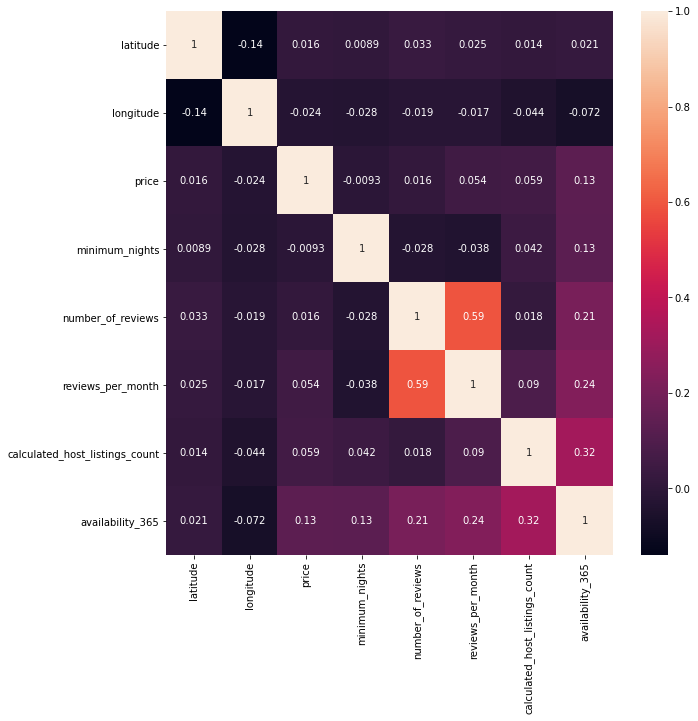

In [12]:
corr.figure

With the exception of availability_365 most relationships are generally weak throughout. 
The strong positive relationship between number_of_reviews and reviews_per_month is because reviews_per_month is a calculated variable based on number_of_reviews.

I find interesting:

- the positive relationship between price and calculated_host_listings_count because it might point towards the fact that potential commercial hosts rent rooms at higher prices

- the positive relationship of availability_365 with calculated_host_listings_count because the more likely a host is to be commercial, the more availability throughout the year they will have

- the positive relationship between mininum_nights and calculated_host_listings_count for the same reason: that commercial hosts potentially run Airbnbs for profit

# 2. Scatterplots

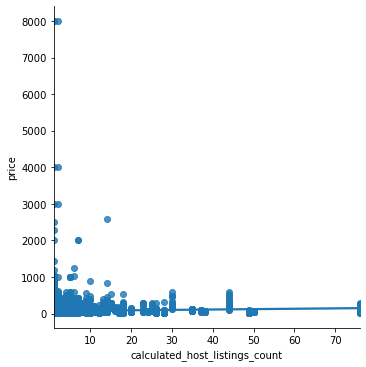

In [13]:
# Create scatterplot for variables "price" and "calculated_host_listings_count"
sns.lmplot(x = 'calculated_host_listings_count', y = 'price', data = df_2)

The outliers at 8000 which I decided to keep now stop me from seeing this scatter plot clearly. 

In [14]:
# I will impute the 8000 values with the mean in order to be able to perform analyses
df_2['price']=df_2['price'].replace(8000,df_2['price'].mean())

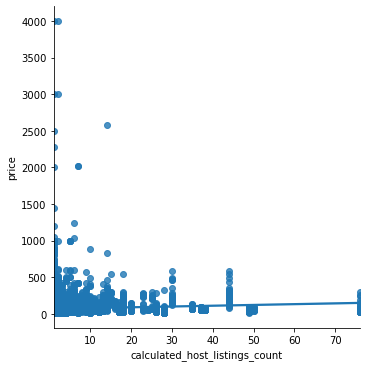

In [15]:
# Try scatterplot again
sns.lmplot(x = 'calculated_host_listings_count', y = 'price', data = df_2)

We can see that the most expensive rooms are run by hosts with 1-3 listings. 

A relatively high amount of hosts has 1-2 listings and a big mass of hosts has up to 19 listings, which include quite a few higher priced ones. 

We have significant amounts of hosts with 20 to 30, as well as 45 listings, who have rooms priced up to 600 EUR / night. 

The data points cluster fairly well around the line of best fit, however I would argue there is a down curve at first, before the values go up again.

There is definitely a relationship between price and calculated_host_listings_count but the reason is not clear because it is not clearly linear.

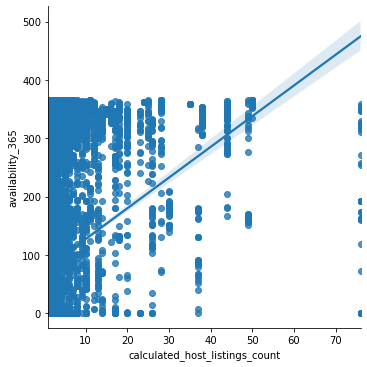

In [16]:
# Create scatterplot to explore "calculated_host_listings_count" and "availability_365"
sns.lmplot(x = 'calculated_host_listings_count', y = 'availability_365', data = df_2)

Here there's also a relationship, which is also not linear. 

# 3. Pair plots

In [17]:
# Create new subset for pair plot with only relevant variables
df_3 = df_2[['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']]

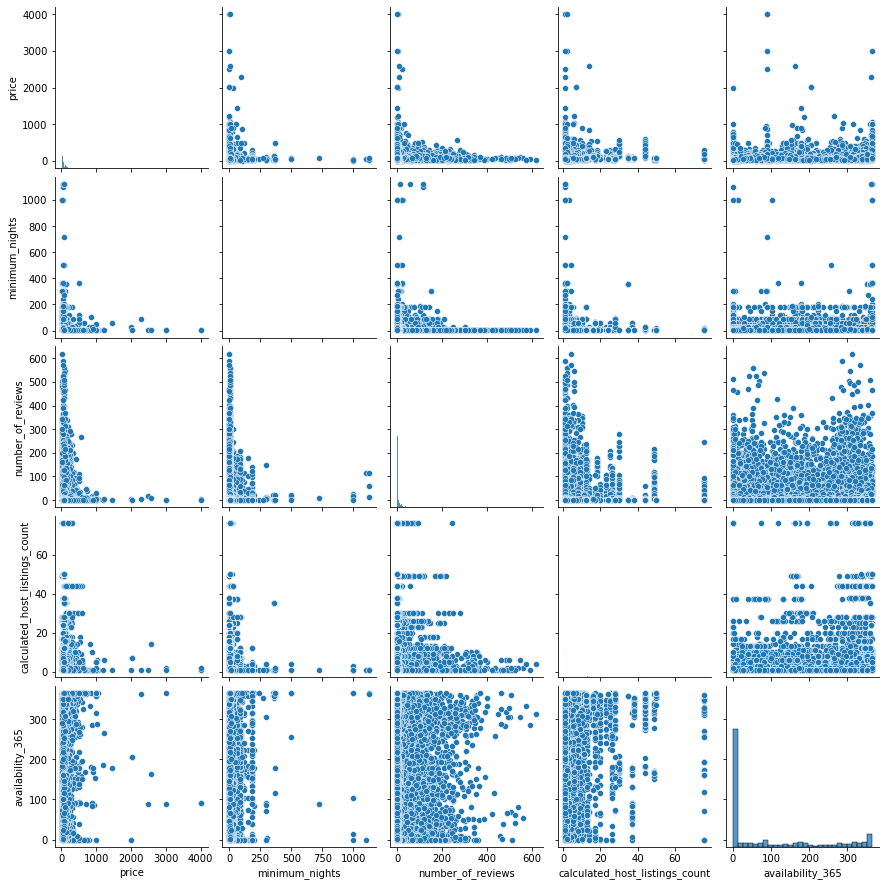

In [18]:
# Create pair plot
p = sns.pairplot(df_3)

Here I find interesting that: 

- the price of rooms with an availability of up to 90 days is significantly higher than the rest. Could that be the legal limit of days for private hosts renting rooms? Is a 3 month stay especially in demand in Berlin?  

- likewise, the price of rooms available 365 days / year is higher. Why?

- the number of reviews is highest for hosts with 6 or 24 listings. Could these be part- and full-time commercial hosts?

- most rooms are available between 0 and 20 days and 350 and 365 days. Why?

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

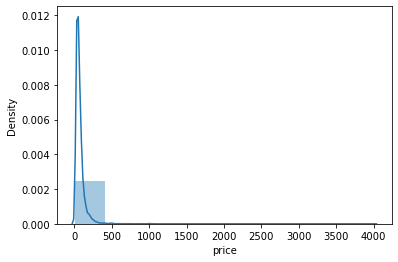

In [34]:
# Create histogram of price
sns.distplot(df_2['price'], bins = 10)

# 4. Derive new columns

In [20]:
# Define categories
df_2.loc[df_2['price'] < 80, 'Price_category'] = 'Low price'

In [21]:
df_2.loc[(df_2['price'] >= 80) & (df_2['price'] < 300), 'Price_category'] = 'Middle price'

In [22]:
df_2.loc[df_2['price'] >= 500, 'Price category'] = 'High price'

In [23]:
df_2.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Price category
0,Mitte,52.54433,13.39761,Private room,28.0,60,18,0.21,3,101,Low price
1,Mitte,52.53305,13.40394,Entire home/apt,74.0,90,141,2.20,6,357,Low price
2,Pankow,52.53471,13.41810,Entire home/apt,90.0,62,147,1.14,1,254,Middle price
3,Tempelhof - Schöneberg,52.49884,13.34940,Private room,29.0,7,27,0.28,1,285,Low price
4,Friedrichshain-Kreuzberg,52.51163,13.45289,Entire home/apt,79.0,7,135,1.02,1,0,Low price


In [24]:
# Count price category
df_2['Price category'].value_counts(dropna = False)

Low price       13821
Middle price     5031
High price        243
Name: Price category, dtype: int64

# 5. Categorical plots

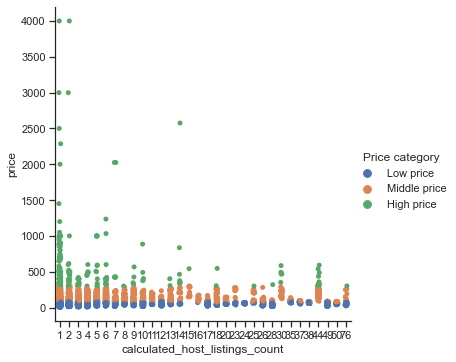

In [30]:
# Create catplot with categories
sns.set(style="ticks")
p = sns.catplot(x="calculated_host_listings_count", y="price", hue="Price category", data=df_2)

Now we can see at one glance how many rooms of the high and middle price categories are run by potential commercial as opposed to private hosts. 

Potential commercial hosts can be considered as those having more than 2 properties. Up to 2 properties run privately is reasonable- you could rent your own and one of your friends' alternatively, both hosts then using the 2nd apartment to stay while one is rented. 

Based on the above assumption, the most expensive properties in Berlin seem to be rented out by private hosts. 

# 6. Early visual EDA

In [31]:
# Check counts of room types
df_2['room_type'].value_counts(dropna=False)

Entire home/apt    10636
Private room        8042
Shared room          249
Hotel room           168
Name: room_type, dtype: int64

In [32]:
# Check number of rooms in each neighbourhood_group by room type
crosstab = pd.crosstab(df_2['neighbourhood_group'], df_2['room_type'], dropna = False)

In [33]:
crosstab

room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood_group,,,,
Charlottenburg-Wilm.,883,43,625,16
Friedrichshain-Kreuzberg,2254,9,1877,57
Lichtenberg,284,8,306,14
Marzahn - Hellersdorf,71,1,67,3
Mitte,2472,49,1556,96
Neukölln,1249,0,1346,13
Pankow,1882,26,1048,25
Reinickendorf,136,0,132,3
Spandau,84,7,46,1


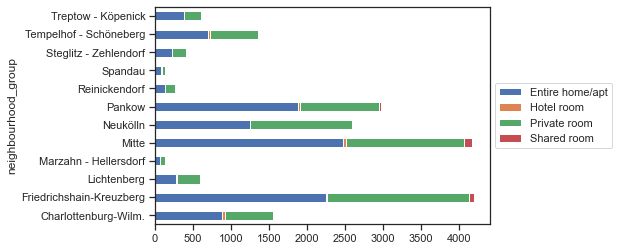

In [34]:
cross_plot_1=crosstab.plot(kind='barh', stacked=True).legend(loc='center left', bbox_to_anchor=(1, 0.5))

Most rooms for rent are in Mitte and Friedrichshain-Kreuzberg. 

Most entire homes for rent are in Mitte.

In [35]:
# Check neighbourhood_group x price category
crosstab_2 = pd.crosstab(df_2['neighbourhood_group'], df_2['Price category'], dropna = False)

In [36]:
crosstab_2

Price category,High price,Low price,Middle price
neighbourhood_group,,,
Charlottenburg-Wilm.,34,1061,472
Friedrichshain-Kreuzberg,37,3086,1074
Lichtenberg,7,518,87
Marzahn - Hellersdorf,3,110,29
Mitte,84,2724,1365
Neukölln,13,2188,407
Pankow,33,2022,926
Reinickendorf,1,230,40
Spandau,1,99,38


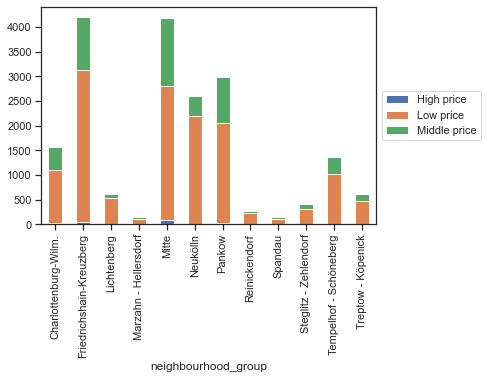

In [37]:
cross_plot_2=crosstab_2.plot(kind='bar', stacked=True).legend(loc='center left', bbox_to_anchor=(1, 0.5))

Most middle price properties are in Mitte, followed by Friedrichshain-Kreuzberg and Pankow. 

Most low price properties for rent are in Friedrichshain-Kreuzberg. 

The only neighbourhood with high price rentals is Mitte. 

The neighbourhoods with least properties for rent are Marzahn-Hellersdorf and Spandau. 

In [38]:
# Define categories for rental availability
df_2.loc[df_2['availability_365'] <= 90, 'Rental availability'] = 'Short term'

In [39]:
df_2.loc[(df_2['availability_365'] > 90) & (df_2['availability_365'] <= 180) , 'Rental availability'] = 'Middle term'

In [40]:
df_2.loc[df_2['availability_365'] > 180, 'Rental availability'] = 'Long term'

In [41]:
df_2['Rental availability'].value_counts(dropna=False)

Short term     12897
Long term       4496
Middle term     1702
Name: Rental availability, dtype: int64

In [42]:
crosstab_3=pd.crosstab(df_2['Rental availability'], df_2['Price category'], dropna = False)

In [43]:
crosstab_3

Price category,High price,Low price,Middle price
Rental availability,,,
Long term,127,2595,1774
Middle term,37,1010,655
Short term,79,10216,2602


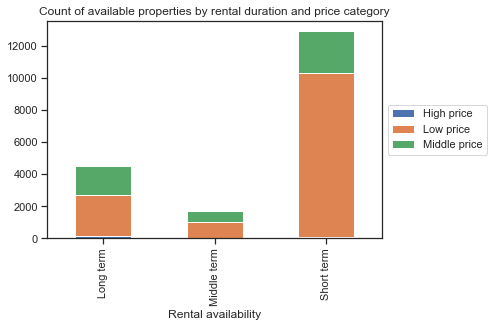

In [46]:
# Plot it
cross_plot_3=crosstab_3.plot(kind='bar', stacked=True, title="Count of available properties by rental duration and price category").legend(loc='center left', bbox_to_anchor=(1, 0.5))

Most properties are available for short term and fall in the low price category. 

In [47]:
df_2.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Price category,Rental availability
0,Mitte,52.54433,13.39761,Private room,28.0,60,18,0.21,3,101,Low price,Middle term
1,Mitte,52.53305,13.40394,Entire home/apt,74.0,90,141,2.20,6,357,Low price,Long term
2,Pankow,52.53471,13.41810,Entire home/apt,90.0,62,147,1.14,1,254,Middle price,Long term
3,Tempelhof - Schöneberg,52.49884,13.34940,Private room,29.0,7,27,0.28,1,285,Low price,Long term
4,Friedrichshain-Kreuzberg,52.51163,13.45289,Entire home/apt,79.0,7,135,1.02,1,0,Low price,Short term


In [64]:
# Check mean price per neighourhood
df_2.groupby('neighbourhood_group').agg({'price': 'mean'}).sort_values('price', ascending=False)

,price
neighbourhood_group,
Mitte,83.658816
Charlottenburg-Wilm.,82.386030
Pankow,74.450295
Spandau,74.398551
Marzahn - Hellersdorf,73.605634
Tempelhof - Schöneberg,72.011670
Steglitz - Zehlendorf,71.493976
Friedrichshain-Kreuzberg,68.084663
Treptow - Köpenick,68.053715


The highest average price can be found in Mitte, followed by Charlottenburg-Wilmersdorf and Pankow. 

In [70]:
# Check count of availability per year by property type 
entire_home_availability=df_2.groupby('room_type').agg({'availability_365': ['sum']})

In [72]:
entire_home_availability

,availability_365
,sum
room_type,
Entire home/apt,1085830
Hotel room,43731
Private room,576350
Shared room,36922


The type of property with most availability throughout the year are entire homes. 

In [93]:
# Create new category for host type for later analysis
df_2.loc[df_2['calculated_host_listings_count'] <= 2, 'Host type'] = 'Private host'

In [94]:
df_2.loc[df_2['calculated_host_listings_count'] > 2, 'Host type'] = 'Commercial host'

In [95]:
df_2.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Price category,Rental availability,host_type,Host type
0,Mitte,52.54433,13.39761,Private room,28.0,60,18,0.21,3,101,Low price,Middle term,Commercial host,Commercial host
1,Mitte,52.53305,13.40394,Entire home/apt,74.0,90,141,2.20,6,357,Low price,Long term,Commercial host,Commercial host
2,Pankow,52.53471,13.41810,Entire home/apt,90.0,62,147,1.14,1,254,Middle price,Long term,Private host,Private host
3,Tempelhof - Schöneberg,52.49884,13.34940,Private room,29.0,7,27,0.28,1,285,Low price,Long term,Private host,Private host
4,Friedrichshain-Kreuzberg,52.51163,13.45289,Entire home/apt,79.0,7,135,1.02,1,0,Low price,Short term,Private host,Private host


In [96]:
# Drop column host_type (I renamed it for consistency)
df_2 = df_2.drop(columns = ['host_type'])

In [97]:
df_2.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Price category,Rental availability,Host type
0,Mitte,52.54433,13.39761,Private room,28.0,60,18,0.21,3,101,Low price,Middle term,Commercial host
1,Mitte,52.53305,13.40394,Entire home/apt,74.0,90,141,2.20,6,357,Low price,Long term,Commercial host
2,Pankow,52.53471,13.41810,Entire home/apt,90.0,62,147,1.14,1,254,Middle price,Long term,Private host
3,Tempelhof - Schöneberg,52.49884,13.34940,Private room,29.0,7,27,0.28,1,285,Low price,Long term,Private host
4,Friedrichshain-Kreuzberg,52.51163,13.45289,Entire home/apt,79.0,7,135,1.02,1,0,Low price,Short term,Private host


In [98]:
# Count host types
df_2['Host type'].value_counts(dropna=False)

Private host       15893
Commercial host     3202
Name: Host type, dtype: int64

In [99]:
# Check mean price per host type 
host_type_mean=df_2.groupby('Host type').agg({'price': 'mean'})

In [100]:
host_type_mean

,price
Host type,
Commercial host,102.075578
Private host,66.042416


The mean price of properties run by commercial hosts is nearly twice as high as the one of private hosts. 

This is further aggravated by the fact htat there are 5 times more private than commercial hosts. 

It also further suggests to check the correlation between calculated_host_listing_count and price for statistical relevance. 

In [75]:
# Export useful visuals, set path
path = r'/Users/OldBobJulia/Desktop/CF/Course/6. Advanced Analytics and Dashboard Design/Berlin Airbnb Analysis' 

In [76]:
cross_plot_1.figure.savefig(os.path.join(path, 'EDA_neighbourhood_roomtype.png'))

In [77]:
cross_plot_2.figure.savefig(os.path.join(path, 'EDA_neighbourhood_pricecat.png'))

In [78]:
cross_plot_3.figure.savefig(os.path.join(path, 'EDA_rentalavail_pricecat.png'))

In [101]:
# Export wrangled data set with derived columns
df_2.to_csv(os.path.join(path, '02 Data','Prepared Data', 'listing_derivedcolumns.csv'))